# Homework 6: Permutation Testing, Percentiles, and Bootstrapping

## Due Tuesday, November 15th at 11:59PM

Welcome to Homework 6! This homework will cover:

- Permutation Testing (see [CIT 12.0-12.2](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html))
- Percentiles (see [CIT 13.1](https://inferentialthinking.com/chapters/13/1/Percentiles.html))
- Bootstrapping and Confidence Intervals (see [CIT 13.2](https://inferentialthinking.com/chapters/13/2/Bootstrap.html), and [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html))

### Instructions

This assignment is due Tuesday, November 15th at 11:59PM. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Don't change this cell; just run it. 
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

%reload_ext pandas_tutor

### Aside: Random Seeds 🌱

Throughout this homework – and the Final Project – you'll notice that we frequently call the function `np.random.seed` with an integer argument. What exactly does that do?

To see for yourself, run the cell below several times.

In [2]:
np.random.seed(25)

print(np.random.multinomial(10, [0.5, 0.5]))
print(np.random.multinomial(10, [0.5, 0.5]))

[7 3]
[5 5]


`np.random.multinomial(10, [0.5, 0.5])` should return a random result each time it's called. However, each time you ran the cell above, you saw the same output – `[7 3]` and `[5 5]`.

**If you call `np.random.seed` in a cell, then every time you run the cell, you will see the same results, even if there are calls to "random" functions and methods in the cell.** Think of calling `np.random.seed` as "undoing" the randomness in the cell. If you change the `25` above to some other number, you may see something other than `[7 3]` and `[5 5]`, but each time you run the changed cell, you will still see the same result.

We use seeds to make it easier to autograde questions that rely on randomness, such as those that require you to bootstrap. When we use a particular seed in a question, we know exactly what the correct answer should be. When we don't, the range of correct answers is much wider, so it's harder to tell whether you actually answered the question correctly.

You're not responsible for understanding how seeds and random number generators work under the hood – all you need to know is that when you see a call to `np.random.seed`:
- Don't change it.
- Don't be alarmed if you see the same results each time you run that cell.

If you're interested in learning more, read [this Wikipedia article](https://en.wikipedia.org/wiki/Pseudorandom_number_generator).
<!-- It turns out that generating _truly_ random numbers is quite difficult. Instead, computers often generate _pseudorandom_ numbers, which are numbers that look like they were generated randomly (such as those in the cell above) but were actually generated by a complicated, non-random process. Each of these processes has a "key", or "seed," that determines the initial conditions for this non-random process. -->

## 1. Rideshare Rates in Boston 🚕📱

In this section, we will work with a dataset of rideshare data from [Kaggle](https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices?select=cab_rides.csv). The dataset contains information on Lyft and Uber rides from Boston during November and December of 2018. The data has been cleaned and condensed for the purposes of this question.

The rideshare data contains six columns: `'app'`, `'mode'`, `'destination'`, `'source'`, `'distance'`, `'price'`. Let's read it in and store it as a DataFrame called `rideshare`.

| Column | Description |
| --- | --- |
| `'app'` | Rideshare App (Lyft or Uber) |
| `'mode'` | Ride tier/mode |
| `'destination'` | Destination area in Boston |
| `'source'` | Ride origin area in Boston |
| `'distance'` | Ride distance (miles) |
| `'price'` | Ride price (USD) |

In [3]:
rideshare = bpd.read_csv('data/rideshare_boston.csv')
rideshare

,app,mode,destination,source,distance,price
0,Uber,Black SUV,Financial District,Northeastern University,4.57,37.5
1,Uber,Black,Financial District,North End,1.04,15.0
2,Lyft,Lyft XL,Back Bay,Fenway,1.51,13.5
3,Lyft,Lyft,Northeastern University,Back Bay,1.07,7.0
4,Uber,Black SUV,Back Bay,North End,2.38,35.0
...,...,...,...,...,...,...
76552,Lyft,Lyft,Boston University,Financial District,5.01,16.5
76553,Uber,UberPool,Theatre District,Boston University,2.98,12.0
76554,Lyft,Lux Black,Back Bay,Fenway,1.42,16.5
76555,Uber,UberXL,Northeastern University,West End,3.15,17.5


**Question 1.1.** The `'mode'` column contains several categories, which represent the ride tiers. A ride tier is an option for the type of car you're requesting. For example, when you request an Uber, one tier is an UberXL, which corresponds to a larger vehicle like an SUV. Another is Uber Pool, which is for a shared ride. (Uber Pool was phased out in 2020 due to COVID, but has recently been reintroduced as [UberX Share](https://bgr.com/tech/uber-pool-is-finally-back-but-with-a-brand-new-name/).) 

Below, assign `lyft_modes` to an array of the names of all unique Lyft ride modes, and `uber_modes` to an array of the names of all unique Uber ride modes.

In [4]:
lyft_modes = rideshare[rideshare.get('app') == 'Uber'].get('mode').unique()
uber_modes = rideshare[rideshare.get('app') == 'Lyft'].get('mode').unique()

# Don't change the following two lines:
print('lyft_modes:', lyft_modes)
print('uber_modes:', uber_modes)
# lyft_modes, uber_modes

lyft_modes: ['Black SUV' 'Black' 'UberXL' 'UberPool' 'WAV' 'UberX']
uber_modes: ['Lyft XL' 'Lyft' 'Lux' 'Lux Black XL' 'Lux Black' 'Shared']


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

For the next few problems, we will be working with basic Lyft and UberX ride modes only, since they are the most commonly used ride tiers for each company. Run the next cell to query only the basic Lyft rides and UberX rides. We are saving these rides in a DataFrame called `economy_rides`.

In [6]:
lyft_mode = (rideshare.get('app') == 'Lyft') & (rideshare.get('mode') == 'Lyft')
uber_x_mode = (rideshare.get('app') == 'Uber') & (rideshare.get('mode') == 'UberX')
economy_rides = rideshare[lyft_mode | uber_x_mode].reset_index(drop=True)
economy_rides

,app,mode,destination,source,distance,price
0,Lyft,Lyft,Northeastern University,Back Bay,1.07,7.0
1,Lyft,Lyft,Northeastern University,Beacon Hill,2.47,9.0
2,Lyft,Lyft,Beacon Hill,Fenway,2.41,9.0
3,Lyft,Lyft,Fenway,Beacon Hill,2.39,9.0
4,Uber,UberX,Fenway,West End,2.84,10.5
...,...,...,...,...,...,...
12672,Lyft,Lyft,Northeastern University,Financial District,3.35,13.5
12673,Lyft,Lyft,North Station,Fenway,3.22,10.5
12674,Uber,UberX,Beacon Hill,Boston University,2.79,10.5
12675,Uber,UberX,West End,Northeastern University,3.34,12.5


Moving forward, "Lyft" will refer to Lyft mode rides, and "Uber" will refer to UberX mode rides. Subsequent questions will use the `economy_rides` DataFrame, not the `rideshare` DataFrame.

**Question 1.2.** To compare the price of Lyft rides and Uber rides, let’s find the price per mile for each ride. For example, a ride that cost \\$10 and that drove a distance of 2.5 miles has a price per mile of $\frac{10}{2.5}$ = \\$4 per mile.

In the `economy_rides` DataFrame, add a new column named `'price_per_mile'` which contains the price per mile for each ride. Then, find the max, min, median, and mean `'price_per_mile'` of all rides in `economy_rides`, and save these values **in this order** in an array called `price_stats`.

In [7]:
economy_rides = economy_rides.assign(price_per_mile=economy_rides.get('price')/economy_rides.get('distance'))
price_per_mile = economy_rides.get('price_per_mile')
price_stats = np.array([price_per_mile.max(), price_per_mile.min(), price_per_mile.median(), price_per_mile.mean()])
price_stats

array([233.33333333,   1.91693291,   4.62555066,   5.60581587])

In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Using the `economy_rides` DataFrame, calculate the difference between the **mean** `'price_per_mile'` of Uber rides and Lyft rides. Assign your answer to `observed_difference`.

$$\text{observed difference} = \text{mean Uber price per mile} - \text{mean Lyft price per mile}$$

In [9]:
observed_difference = economy_rides[economy_rides.get('app') == 'Uber'].get('price_per_mile').mean() - economy_rides[economy_rides.get('app') == 'Lyft'].get('price_per_mile').mean()
observed_difference

0.43794709632194806

In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** What does the number you obtained for `observed_difference` mean? Assign `q1_4` to 1, 2, 3, or 4, corresponding to the best explanation below.

1. In our sample, the mean Uber price per mile is higher than the mean Lyft price per mile by about 44 percent.
2. In our sample, the mean Uber price per mile is higher than the mean Lyft price per mile by about 44 cents per mile.
3. In our sample, the mean Uber price per mile is lower than the mean Lyft price per mile by about 44 percent.
4. In our sample, the mean Lyft price per mile is higher than the mean Uber price per mile by about 44 cents per mile.

In [11]:
q1_4 = 2

In [12]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Now we want to conduct a permutation test (i.e. an A/B test) to see if it is by chance that the average price per mile for Uber rides is higher than the average price per mile for Lyft rides in our sample, or if Uber rides really are more expensive per mile on average than Lyft rides. 

- **Null Hypothesis:** The prices per mile of Uber rides and Lyft rides come from the same distribution.  
- **Alternative Hypothesis:** The prices per mile of Uber rides are higher on average than the prices per mile of Lyft rides.

**Question 1.5.** Assign `uber_lyft_price` to a DataFrame with only two columns, `'app'` and `'price_per_mile'`, since these are the only relevant columns in `economy_rides` for this permutation test.

<!--
BEGIN QUESTION
name: q1_5
-->

In [13]:
uber_lyft_price = bpd.DataFrame().assign(app=economy_rides.get('app'), price_per_mile=economy_rides.get('price_per_mile'))
uber_lyft_price

,app,price_per_mile
0,Lyft,6.542056
1,Lyft,3.643725
2,Lyft,3.734440
3,Lyft,3.765690
4,Uber,3.697183
...,...,...
12672,Lyft,4.029851
12673,Lyft,3.260870
12674,Uber,3.763441
12675,Uber,3.742515


In [14]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** To perform the permutation test, 500 times, create two random groups by shuffling the `'app'` column of `uber_lyft_price`. Don't change the `'price_per_mile'` column. For each pair of random groups, calculate the difference in mean price per mile (Uber minus Lyft) and store your 500 differences in the `differences` array.  

*Note*: Since we are working with a relatively large data set, it may take **up to five minutes** to generate 500 permutations. One suggestion is to make sure your code works correctly with fewer repetitions, say, 20, before using 500 repetitions.

In [15]:
differences = np.array([])
# differences_t = np.array([])
repetitions = 500
for i in range(repetitions):
    permutation = uber_lyft_price.assign(shuffled = np.random.permutation(uber_lyft_price.get('app')))
    permutation_mean = permutation.groupby('shuffled').mean()
    # differences_t = np.append(differences_t, permutation[permutation.get('shuffled') == 'Uber'].get('price_per_mile').mean() - permutation[permutation.get('shuffled') == 'Lyft'].get('price_per_mile').mean())
    differences = np.append(differences, permutation_mean.loc['Uber'] - permutation_mean.loc['Lyft'])

# Just display the first ten differences.
# print(differences_t[:10])

print(differences[:10])

[-0.14302529  0.04256773 -0.00870551 -0.05362413 -0.17060302  0.05845867
 -0.08211038 -0.08342916 -0.04795688 -0.09586698]


In [16]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Compute a p-value for this hypothesis test and assign your answer to `p_val`. To decide whether to use `<=` or `>=` in the calculation of the p-value, think about whether larger values or smaller values of our test statistic favor the alternative hypothesis.

In [17]:
p_val = np.count_nonzero(differences >= observed_difference) / repetitions
p_val

0.0

In [18]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8.** Assign the variable `q1_8` to a **list** of all the true statements below.

1. We accept the null hypothesis at the 0.05 significance level.
2. We reject the null hypothesis at the 0.01 significance level.
3. We fail to reject the null hypothesis at the 0.01 significance level.
4. We accept the null hypothesis at the 0.01 significance level.
5. We fail to reject the null hypothesis at the 0.05 significance level.
6. We reject the null hypothesis at the 0.05 significance level.

In [19]:
q1_8 = [1, 6]

In [20]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Suppose in this question you had shuffled the `'price_per_mile'` column instead and kept the `'app'` column in the same order. Assign `q1_9` to either 1, 2, 3, or 4, corresponding to the true statement below.


1. The new p-value from shuffling `'price_per_mile'` would be $1 - p$, where $p$ is the old p-value from shuffling `'app'` (i.e. your answer to Question 1.7).
2. We would need to change our null hypothesis in order to shuffle the `'price_per_mile'` column. 
3. There would be no difference in the conclusion of the test if we had shuffled the `'price_per_mile'` column instead.
4. The `'price_per_mile'` column cannot be shuffled because it contains numbers.

In [21]:
q1_9 = 3

In [22]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 1.10.** Which of the following choices best describes the purpose of shuffling one of the columns in our dataset in a permutation test? Assign `q1_10` to either 1, 2, 3, or 4.
1. Shuffling allows us to generate new data under the null hypothesis, which we can use in testing our hypothesis.
2. Shuffling mitigates noise in our data by generating new permutations of the data.
3. Shuffling is a special case of bootstrapping and allows us to produce interval estimates.
4. Shuffling allows us to generate new data under the alternative hypothesis, which explains that the data come from different distributions.

In [23]:
q1_10 = 1

In [24]:
grader.check("q1_10")

q1_10 results: All test cases passed!

## 2. Cerealsly Sugary Percentiles 🥣

Percentiles associate numbers in a dataset to their positions when the dataset is sorted in ascending order. You may be familiar with the idea of percentiles from height and weight measurements at the doctor's office, or from standardized test scores.

There are many different ways to precisely define a percentile. In [Lecture 19](https://dsc10.com/resources/lectures/lec19/lec19.html#Percentiles), we saw two different approaches:
- Using a mathematical definition (see the slide in Lecture 19 titled _[How to calculate percentiles using mathematical definition](https://dsc10.com/resources/lectures/lec19/lec19.html#How-to-calculate-percentiles-using-mathematical-definition)_).
- Using `np.percentile`.

In Questions 2.1 through 2.4, we will use the mathematical definition, and in Question 2.5, we will use `np.percentile`.

The file `cereal.csv` contains some nutritional information on different breakfast cereals. The data comes from [Kaggle](https://www.kaggle.com/datasets/crawford/80-cereals). The `'mfr'` column uses abbreviations for the manufacturer:
- `'A'`: American Home Food Products
- `'G'` General Mills
- `'K'`: Kelloggs
- `'N'`: Nabisco
- `'P'`: Post
- `'Q'`: Quaker Oats
- `'R'`: Ralston Purina

Other columns are:
- `'name'`: the name of the cereal
- `'type'`: C for cold cereals, H for hot cereals
- `'calories'`: calories per serving
- `'protein'`: grams of protein
- `'fat'`: grams of fat
- `'sodium'`: milligrams of sodium
- `'fiber'`: grams of dietary fiber
- `'carbo'`: grams of complex carbohydrates
- `'sugars'`: grams of sugars
- `'potass'`: milligrams of potassium
- `'vitamins'`: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- `'shelf'`: display shelf (1, 2, or 3, counting from the floor)
- `'weight'`: weight in ounces of one serving
- `'cups'`: number of cups in one serving
- `'rating'`: a nutritional rating of the cereal (higher means more nutritious)

In [25]:
cereal = bpd.read_csv('data/cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


**Question 2.1.** Pick the best choice of bins below for a histogram showing the distribution of `'rating'`, then create the histogram.

Use one of the following:

- `rating_bins = np.arange(0, 50, 10)`
- `rating_bins = np.arange(0, 120, 10)`
- `rating_bins = np.arange(0, 150, 50)`
- `rating_bins = np.arange(0, 1000, 10)`

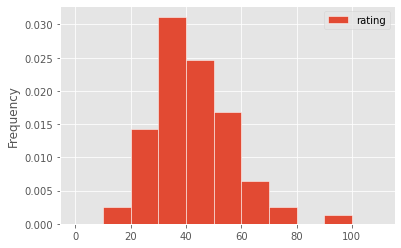

In [26]:
rating_bins = np.arange(0, 120, 10)
cereal.plot(kind='hist', density=True, bins=rating_bins, y='rating', ec='w');
# Now create a density histogram showing the distribution of rating using rating_bins

Consider only the cereals that were manufactured by General Mills (`'G'`) and have more than 7 grams of sugar.

In [27]:
general_mills_sugary_cereals = (cereal[(cereal.get('mfr') == 'G') & (cereal.get('sugars') > 7)])
general_mills_sugary_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301


Let's extract the `'ratings'` data for these cereals and store them as an array called `general_mills_sugary_ratings`. We'll sort the array, too.

In [28]:
general_mills_sugary_ratings = np.array(general_mills_sugary_cereals.get('rating'))
general_mills_sugary_ratings = np.sort(general_mills_sugary_ratings)
general_mills_sugary_ratings

array([19.823573, 22.396513, 22.736446, 23.804043, 26.734515, 27.753301,
       28.592785, 29.509541, 30.450843, 31.072217, 36.176196, 36.187559,
       37.038562, 39.7034  ])

**Question 2.2.** Calculate the 80th percentile of `general_mills_sugary_ratings` using the **[mathematical definition](https://dsc10.com/resources/lectures/lec19/lec19.html#How-to-calculate-percentiles-using-mathematical-definition)** given in Lecture 19. That is:
- Set `n` to be the number of elements in `general_mills_sugary_ratings`. 
- Set `k` to be the smallest integer greater than $\frac {80}{100} \cdot n$. 
- Assign the 80th percentile of the array `general_mills_sugary_ratings` to `general_mills_sugary_80th`.

You must use the variables provided for you when solving this problem. For this problem, **do not** use `np.percentile`.

In [29]:
n = len(general_mills_sugary_ratings)
k = np.ceil((80/100) * n)

# Don't change this line. In order to proceed, k needs to be stored as an int, not a float.
# This line is not changing the mathematical value of k, just how it is stored.
k = int(k)

general_mills_sugary_80th = general_mills_sugary_ratings[k-1]
general_mills_sugary_80th

36.187559

In [30]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Now we'll compare the 80th percentile of the ratings of **sugary General Mills cereals** with the 80th percentile of the ratings of **sugary cereals manufactured by all companies other than General Mills**.

Create a DataFrame called `sugary_cereals` containing only the cereals with a `'mfr'` that isn't `'G'`, with more than seven grams of sugar. Calculate the 80th percentile of ratings for these cereals, using the same mathematical procedure, and assign to the variable `absolute_difference` the absolute difference in the 80th percentile of ratings for sugary General Mills cereals and all other sugary cereals.

As before, use the variables provided and **do not** use `np.percentile`.

*Hint*:  Remember to sort the ratings using `np.sort` before computing percentiles.

In [31]:
sugary_cereals = cereal[(cereal.get('mfr') != 'G') & (cereal.get('sugars') > 7)]
sugary_cereals_ratings = np.sort(sugary_cereals.get('rating'))

n_2 = len(sugary_cereals_ratings)
k_2 = np.ceil((80/100) * n_2)

k_2 = int(k_2) # Don't change this.

sugary_80th = sugary_cereals_ratings[k_2 - 1]

absolute_difference = abs(general_mills_sugary_80th - sugary_80th)
absolute_difference

0.9493039999999979

In [32]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Say that General Mills wants to create a new sugary cereal for UCSD students called the "U Cereal SD" in honor of UCSD’s [record enrollment](https://www.sandiegouniontribune.com/news/education/story/2022-10-17/uc-san-diego-enrollment-hits-record) of 42,968 students this year. In a strange coincidence, the cereal got a nutritional rating of exactly 42.968!

Consider a new collection of values, containing all the values in `general_mills_sugary_ratings`, plus one more, 42.968:

In [33]:
new_collection = np.append(general_mills_sugary_ratings, 42.968)
new_collection = np.sort(new_collection)
new_collection

array([19.823573, 22.396513, 22.736446, 23.804043, 26.734515, 27.753301,
       28.592785, 29.509541, 30.450843, 31.072217, 36.176196, 36.187559,
       37.038562, 39.7034  , 42.968   ])

For what integer values of $p$ would we be able to say that this new collection of values has 42.968 as its $p$th percentile? Create a **list** called `percentile_range` of all integer values of $p$ such that the $p$th percentile of the new collection equals 42.968, according to the **mathematical** definition of percentile. 

This is a math question, not a coding question. You should create the list `percentile_range` manually, by solving a math problem on paper and inputting your answer in the form of a Python list.

**Do not use `np.percentile`.**

In [34]:
n_3 = len(new_collection)
k_3 = np.ceil((94/100) * n_3)
k_3 = int(k_3)
pth = new_collection[k_3 - 1]

percentile_range = [94, 100]

In [35]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5**. The first _quartile_ of a numerical collection is the 25th percentile, the second quartile is the 50th percentile, and the third quartile is the 75th percentile. Quartiles are so named because they divide the collection into quarters.

Make a list called `sugar_quartiles` that contains the values for the first, second, and third quartiles (in that order) of the `'sugars'` data provided in `cereal`. For this problem, calculate the percentiles **using `np.percentile`**.

In [36]:
sugars = np.sort(cereal.get('sugars'))
sugar_quartiles = [np.percentile(sugars, 25), np.percentile(sugars, 50), np.percentile(sugars, 75)]
sugar_quartiles
sugars

array([-1,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 14, 14, 14, 15, 15])

In [37]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Live Crystal Scoops 🔮

<center><img src='data/scam-thumbnail.jpeg' width=30%>(<a href="https://www.youtube.com/watch?v=KfhMLQxPbLY">source</a>)</center>

Over the last year, _live crystal scoops_ have become popular on TikTok. There are TikTok pages that collect and sell [crystals](https://en.wikipedia.org/wiki/Crystal), which some believe have the power to heal both the body and the mind. These pages don't sell crystals individually, but rather they "scoop" a random collection of their inventory, put the collected crystals in a bag, and send that bag to the customer. What makes them _live_ crystal scoops is that these pages typically livestream the act of scooping these crystals for every order they receive and include the order number in the stream, so that customers can verify that what they receive is actually what was scooped. For instance, [@chloesmith.uk](https://www.tiktok.com/@chloesmith.uk) is one such page.

Last night, you were scrolling endlessly on TikTok, and came across crystal scooping livestreams by two accounts, _Scoops by Shelly_ and _Crystals by Cathy_. Both are selling scoops for $29.99. Intrigued, you decide to order a scoop from Shelly, and in the livestream it seems that you pulled a hefty scoop. When your order is finally delivered, however, you're disappointed to find that the total weight of the crystals you received is much lower than what you expected given what you saw on the livestream. Should you have purchased a scoop from Cathy instead?

**Question 3.1.** Ideally, you want to determine the mean weight of **all** scoops from *Scoops by Shelly*. However, it's not feasible to do so, because her scoops are very expensive and she has many other customers. Instead, you will collect a sample of scoops to obtain a ____________ statistic to estimate this ____________ parameter.

Complete the sentence above by filling in the blanks. Set `q3_1` to 1, 2, 3, or 4.

1. population; sample
2. sample; population
3. test; population
4. test; sample

In [38]:
q3_1 = 2

In [39]:
grader.check("q3_1")

q3_1 results: All test cases passed!

Fortunately, you have an incredible crystal resource at your disposal, the [Crystals Live Share Group](https://www.facebook.com/groups/846961549165998) on Facebook. You make a post and ask the members who've bought scoops from *Scoops by Shelly* and *Crystals by Cathy* to weigh their packages in grams. You're overwhelmed by the amazing community response and receive 80 different scoop weights in total from other buyers, 40 from *Scoops by Shelly* buyers and 40 from *Crystals by Cathy* buyers.  

Let's look at all the data that you crowdsourced. Each entry in the `'Weight'` column represents the weight of one scoop, in grams.

In [40]:
crystal_weights = bpd.read_csv('data/crystals.csv')
crystal_weights

,Seller,Weight
0,Scoops by Shelly,224.26
1,Scoops by Shelly,298.35
2,Scoops by Shelly,259.49
3,Scoops by Shelly,371.21
4,Scoops by Shelly,296.12
...,...,...
75,Crystals by Cathy,448.93
76,Crystals by Cathy,403.07
77,Crystals by Cathy,480.70
78,Crystals by Cathy,382.05


**Question 3.2.** To start, we'll look at only the scoops in our sample from *Scoops by Shelly*. Below, assign `shelly_scoops` to a DataFrame with only the scoops from *Scoops by Shelly*. Then, assign `shelly_mean` to the mean weight of the *Scoops by Shelly* scoops in our sample.

In [41]:
shelly_scoops = crystal_weights[crystal_weights.get('Seller') == 'Scoops by Shelly']
shelly_mean = shelly_scoops.get('Weight').mean()
shelly_mean

314.39075

In [42]:
grader.check("q3_2")

q3_2 results: All test cases passed!

You're done! Or are you? You have a single estimate for the true mean weight of Shelly's scoops. However, you don't know how close that estimate is, or how much it could have varied if you'd had a different sample. In other words, you have an estimate, but no understanding of how close that estimate is to the true mean weight of *all* of Shelly's scoops.

This is where the idea of resampling via **[bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)** comes in. Assuming that our sample resembles the population fairly well, we can resample from our original sample to produce more samples. From each of these resamples, we can produce another estimate for the true mean weight, which gives us a distribution of sample means that describes how the estimate might vary given different samples. We can then use this distribution to produce an interval that estimates the true mean weight of Shelly's scoops.

**Question 3.3.** Complete the following code to produce 1000 bootstrapped estimates for the mean weight of Shelly's scoops. Store your 1000 estimates in an array called `resample_means`.

In [43]:
resample_means = np.array([])
for i in np.arange(1000):
    resample = shelly_scoops.sample(shelly_scoops.shape[0], replace=True)
    resample_mean = resample.get('Weight').mean()
    resample_means = np.append(resample_means, resample_mean)
resample_means

array([298.63925, 335.541  , 321.68225, 305.0945 , 327.5075 , 311.2085 ,
       298.891  , 305.6375 , 308.5865 , 314.51175, 309.95475, 302.52575,
       317.13075, 311.83425, 309.2625 , 318.816  , 310.39025, 308.624  ,
       309.79075, 308.15075, 318.493  , 318.4855 , 301.64775, 318.488  ,
       313.77475, 315.68525, 319.7155 , 310.861  , 317.581  , 303.33175,
       314.74   , 306.095  , 319.1965 , 312.603  , 317.81075, 310.91525,
       311.96525, 311.418  , 323.93725, 334.06725, 312.5775 , 298.466  ,
       309.8345 , 322.77425, 322.98525, 316.3135 , 305.55975, 316.828  ,
       313.471  , 301.7625 , 313.02775, 313.624  , 318.25025, 313.3485 ,
       322.743  , 306.501  , 310.59775, 311.425  , 316.112  , 313.633  ,
       317.7105 , 301.238  , 314.97875, 310.4315 , 326.97175, 318.25025,
       318.352  , 312.80275, 313.8945 , 333.55475, 309.58375, 328.0005 ,
       312.534  , 309.6975 , 316.567  , 324.074  , 310.894  , 316.56775,
       319.0405 , 328.562  , 308.13275, 315.51975, 

In [44]:
grader.check("q3_3")

q3_3 results: All test cases passed!

Let's look at the distribution of your estimates:

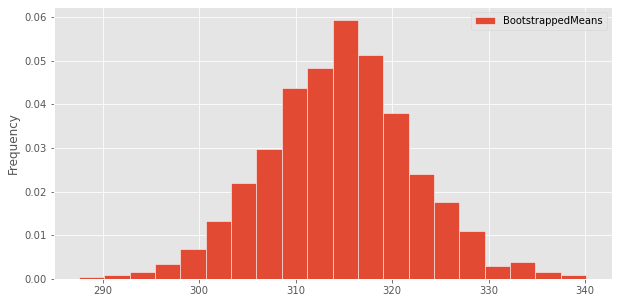

In [45]:
bpd.DataFrame().assign(BootstrappedMeans = resample_means).plot(kind='hist', density=True, ec='w', bins=20, figsize=(10, 5));

**Question 3.4.** Using the array `resample_means`, compute an approximate 95% confidence interval for the true mean weight of Shelly's scoops. Save the lower and upper bounds of the interval as `shelly_lower_bound` and `shelly_upper_bound`, respectively.

*Hint*: Use `np.percentile`.

In [46]:
resample_means = np.sort(resample_means)
shelly_lower_bound = np.percentile(resample_means, 2.5)
shelly_upper_bound = np.percentile(resample_means, 97.5)

#: the confidence interval
print("Bootstrapped 95% confidence interval for the true mean weight of Shelly's scoops: [{:f}, {:f}]".format(shelly_lower_bound, shelly_upper_bound))

Bootstrapped 95% confidence interval for the true mean weight of Shelly's scoops: [299.289756, 329.115662]


In [47]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Which of the following would likely make the histogram from Question 3.3 wider? If you believe more than one would, choose the answer with the most substantial effect. Assign to `q3_5` either 1, 2, 3, or 4.

1. Starting with a larger sample of 100 scoops.
1. Starting with a smaller sample of 20 scoops.
1. Decreasing the number of resamples (repetitions of the bootstrap) to 500.
1. Increasing the number of resamples (repetitions of the bootstrap) to 3000.

In [48]:
q3_5 = 2
q3_5

2

In [49]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Suppose you want to estimate the weight of the lightest scoop Shelly has ever scooped, her biggest scam. Would bootstrapping be effective in estimating this weight? Assign `bootstrapping_effective` to either `True` or `False`, representing your answer.

In [50]:
bootstrapping_effective = False

In [51]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Now let's address a different question: how does the average weight of a *Scoops by Shelly* scoop compare to the average weight of a *Crystals by Cathy* scoop? Create a DataFrame called `cathy_scoops` that contains only the weights of scoops from *Crystals by Cathy*, and set `cathy_mean` equal to the mean weight of Cathy's scoops as you did for *Scoops by Shelly* in Question 3.2. Then, set `observed_diff_mean` to the difference in mean scoop weight for the Shelly and Cathy's scoops in our sample.

$$\text{difference} = \text{mean weight of Shelly's scoops} - \text{mean weight of Cathy's scoops}$$

In [52]:
cathy_scoops = crystal_weights[crystal_weights.get('Seller') == 'Crystals by Cathy']
cathy_mean = cathy_scoops.get('Weight').mean()
observed_diff_mean = shelly_mean - cathy_mean
observed_diff_mean

-88.43225000000001

In [53]:
grader.check("q3_7")

q3_7 results: All test cases passed!

If you completed Question 3.7 correctly, you should have found that Shelly and Cathy's mean scoop weights were quite different. Remember, all we have access to are samples of size 40 from each seller. Would we see this large of a difference if we had access to the population – that is, the weights of all scoops ever produced by both sellers – or was it just by chance that our samples displayed this difference? Let's do a **hypothesis test** to find out. We'll state our hypotheses as follows:

- **Null Hypothesis:** The mean weight of scoops from *Scoops by Shelly* is equal to the mean weight of scoops from *Crystals by Cathy*. Equivalently, the difference in the mean scoop weight for the two sellers equals 0 grams.

- **Alternative Hypothesis:** The mean weight of scoops from *Scoops by Shelly* is not equal to the mean weight of scoops from *Crystals by Cathy*. Equivalently, the difference in the mean scoop weight for the two sellers does not equal 0 grams.

Since we were able to set up our hypothesis test as a question of whether a certain population parameter – the difference in mean scoop weight for *Scoops by Shelly* and *Crystals by Cathy* – is equal to a certain value, we can **test our hypotheses by constructing a confidence interval** for the parameter. This is the method we used in [Lecture 20](https://dsc10.com/resources/lectures/lec20/lec20.html). You can read more about conducting a hypothesis test with a confidence interval in [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html).

*Note*: We are not conducting a permutation test here, although that would also be a valid approach to test these hypotheses.

**Question 3.8.** Compute 1000 bootstrapped estimates for the difference in the mean scoop weight for *Scoops by Shelly* and *Crystals by Cathy*. As in Question 3.7, do Shelly minus Cathy. Store your 1000 estimates in the `difference_means` array.

You should generate your Shelly resamples by sampling from `shelly_scoops`, and your Cathy resamples by sampling from `cathy_scoops`. You should not use `crystal_weights` at all.

In [54]:
np.random.seed(23) # Ignore this, and don't change it.

difference_means = np.array([])
for i in range(1000):
    shuffled = np.random.permutation(crystal_weights.get('Seller'))
    crystal_weights_shuffled = crystal_weights.assign(Shuffled=shuffled).groupby('Shuffled').mean()
    difference_mean = crystal_weights_shuffled.loc['Scoops by Shelly'] - crystal_weights_shuffled.loc['Crystals by Cathy']
    difference_means = np.append(difference_means, difference_mean)

# Just display the first ten differences.
difference_means[:10]

array([ -3.70325,  32.45125,   4.90475, -18.31775,  10.70725, -10.98225,
       -21.19825,   4.32575,   6.67975,   2.01175])

In [55]:
grader.check("q3_8")

q3_8 results: All test cases passed!

Let's visualize your estimates:

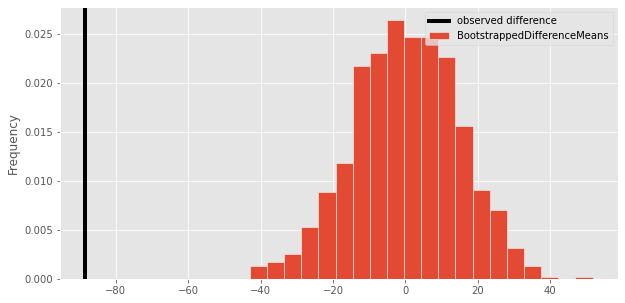

In [56]:
bpd.DataFrame().assign(BootstrappedDifferenceMeans = difference_means).plot(kind = 'hist', density=True, ec='w', bins=20, figsize=(10, 5));
plt.axvline(observed_diff_mean, c='black', linewidth=4, label='observed difference');
plt.legend();

**Question 3.9.** Compute a 95% confidence interval for the difference in mean weights of Shelly and Cathy's scoops (as before, Shelly minus Cathy). Assign the left and right endpoints of this confidence interval to `left_endpoint` and `right_endpoint` respectively. Use `np.percentile` to find the endpoints.

In [57]:
difference_means = np.sort(difference_means)
left_endpoint = np.percentile(difference_means, 2.5)
right_endpoint = np.percentile(difference_means, 97.5)

print("Bootstrapped 95% confidence interval for the mean difference in weights of Shelly and Cathy's scoops:\n [{:f}, {:f}]".format(left_endpoint, right_endpoint))

Bootstrapped 95% confidence interval for the mean difference in weights of Shelly and Cathy's scoops:
 [-29.336500, 27.126738]


In [58]:
grader.check("q3_9")

q3_9 results: All test cases passed!

**Question 3.10.** Based on the confidence interval you've created, would you reject the null hypothesis at the 0.05 significance level? Set `reject_null` to True if you would reject the null hypothesis, and False if you would not.

In [59]:
pval = np.count_nonzero(difference_means <= observed_diff_mean) / 1000
reject_null = True
pval

0.0

In [60]:
grader.check("q3_10")

q3_10 results: All test cases passed!

**Question 3.11.** What if the Facebook group members had recorded all of their scoop weights in pounds instead of grams? Would your hypothesis test still come to the same conclusion either way? Set `same_conclusion` to True or False.

In [61]:
same_conclusion = True

In [62]:
grader.check("q3_11")

q3_11 results: All test cases passed!

## 4. Cheese, Please  🧀

You work for a small grocery store. You are interested in determining which types of cheese to stock in your store, so you survey 500 randomly-selected shoppers and ask which type of cheese they prefer the most among four options – `'Brie'`, `'Cheddar'`, `'Feta'`, `'Mozzarella'`. You also record some indecisive shoppers as `'Undecided'`.

Run the next cell to load in the results of the survey.

In [63]:
cheese = bpd.read_csv('data/cheese.csv')
cheese.reset_index().groupby('cheese').count()

,index
cheese,
Brie,140
Cheddar,120
Feta,50
Mozzarella,160
Undecided,30


Assume that your sample is a uniform random sample of the population of grocery store shoppers. Below, we compute the proportion of shoppers in your sample that prefer each type of cheese.

In [64]:
cheese.assign(counts=cheese.get('cheese')).groupby('cheese').count().get('counts') / cheese.shape[0]

cheese
Brie          0.28
Cheddar       0.24
Feta          0.10
Mozzarella    0.32
Undecided     0.06
Name: counts, dtype: float64

What you're truly interested in, though, is the proportion of *all shoppers* that prefer each type of cheese. These are *population parameters* (plural, because there are 5 proportions).

In this question, we will start by computing a confidence interval for the true proportion of shoppers that prefer `'Mozzarella'`, and then later compute a confidence interval for the true difference in proportions of shoppers that prefer `'Mozzarella'` over `'Brie'`. 

<center><img src="data/cheese_pun.jpg" width=50%></center>

Below, we have given you code that computes 1000 bootstrapped estimates of the true proportion of shoppers who prefer `'Mozzarella'` cheese over the other options. Run the next cell to calculate these estimates and display a histogram of their values.

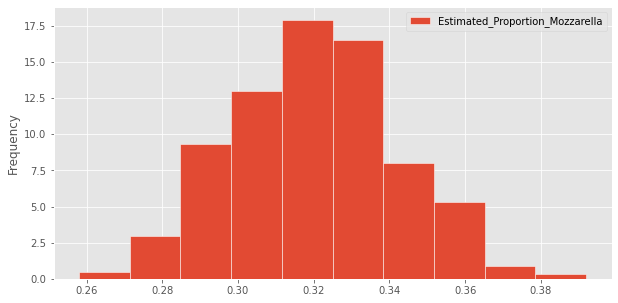

In [65]:
def proportions_in_resamples():
    np.random.seed(55) # Ignore this, and don't change it.
    num_shoppers = cheese.shape[0]
    proportions = np.array([])
    for i in np.arange(1000):
        resample = cheese.sample(num_shoppers, replace = True)
        resample_proportion = np.count_nonzero(resample.get('cheese') == 'Mozzarella') / num_shoppers
        proportions = np.append(proportions, resample_proportion)
    return proportions

boot_mozzarella_proportions = proportions_in_resamples()
bpd.DataFrame().assign(Estimated_Proportion_Mozzarella=boot_mozzarella_proportions).plot(kind='hist', density=True, ec='w', figsize=(10, 5));

**Question 4.1.** Using the array `boot_mozzarella_proportions`, compute an approximate **99%** (not 95%) confidence interval for the true proportion of shoppers who prefer `'Mozzarella'` cheese.  Compute the lower and upper ends of the interval, named `mozzarella_lower_bound` and `mozzarella_upper_bound`, respectively.

*Note*: As we did in lecture, use `np.percentile` whenever computing confidence intervals.

In [66]:
mozzarella_lower_bound = np.percentile(boot_mozzarella_proportions, 0.5)
mozzarella_upper_bound = np.percentile(boot_mozzarella_proportions, 99.5)

# Print the confidence interval:
print("Bootstrapped 99% confidence interval for the true proportion of shoppers who prefer Mozzarella cheese in the population:\n[{:f}, {:f}]".format(mozzarella_lower_bound, mozzarella_upper_bound))

Bootstrapped 99% confidence interval for the true proportion of shoppers who prefer Mozzarella cheese in the population:
[0.269990, 0.374020]


In [67]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.**
Is it true that 99% of the population lies in the range `mozzarella_lower_bound` to `mozzarella_upper_bound`? Assign the variable `q4_2` to either `True` or `False`. 

In [68]:
q4_2 = False

In [69]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.**
Is it true that the true proportion of shoppers who prefer `'Mozzarella'` over the other cheeses is a random quantity with approximately a 99% chance of falling between `mozzarella_lower_bound` and `mozzarella_upper_bound`? Assign the variable `q4_3` to either `True` or `False`.

In [70]:
q4_3 = True

In [71]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.**
Suppose we were somehow able to produce 20,000 new samples, each one a uniform random sample of 500 shoppers taken directly from the population. For each of those 20,000 new samples, we create a 99% confidence interval for the proportion of shoppers who prefer `'Mozzarella'`. Roughly how many of those 20,000 intervals should we expect to actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be of type `int`, representing the *number* of intervals, not the proportion or percentage.

In [72]:
how_many = int(20000 * .99)
how_many

19800

In [73]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** We also created 90%, 95%, and 99.9% confidence intervals from one sample (shown below), but forgot to label which confidence intervals were which! Match the interval to the percent of confidence the interval represents and assign your choices (either 1, 2, or 3) to variables `ci_90`, `ci_95`, and `ci_999`, corresponding to the 90%, 95%, and 99.9% confidence intervals respectively.

*Hint*: Drawing the confidence intervals out on paper might help you visualize them better.

1. $[0.259, 0.389]$

2. $[0.286, 0.358]$

3. $[0.280, 0.362]$

In [74]:
# print(0.259-0.389, 0.286-0.358, 0.280-0.362)
ci_90 = 2
ci_95 = 3
ci_999 = 1
ci_90, ci_95, ci_999

(2, 3, 1)

In [75]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6.** Based on the survey results shown at the start of the question, it seems that `'Mozzarella'` is more popular than `'Brie'` among shoppers. We would like to construct a range of likely values – that is, a confidence interval – for the difference in popularity, which we define as:

$$\text{(Proportion of shoppers who prefer Mozzarella)} - \text{(Proportion of shoppers who prefer Brie)}$$

Create a function, `differences_in_resamples`, that creates **1000 bootstrapped resamples of the original survey data** in the `cheese` DataFrame, computes the difference in proportions for each resample, and returns an array of these differences. Store your bootstrapped estimates in an array called `boot_differences` and plot a histogram of these estimates.

*Note*: While this might sound like a job for permutation testing, this is instead a bootstrapping question. Note that our goal is to estimate a population parameter – the difference between the proportion of all shoppers that prefer Mozzarella and the proportion of all shoppers that prefer Brie – not to answer a question about whether two samples come from the same distribution.

*Hint*: Use the code for `proportions_in_resamples` given to you above as a starting point.

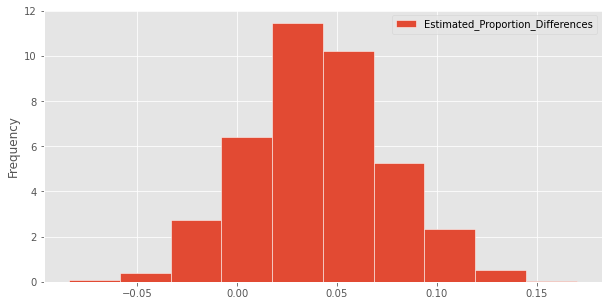

In [76]:
def differences_in_resamples():
    np.random.seed(55) # Ignore this, and don't change it.
    num_shoppers = cheese.shape[0]
    proportions = np.array([])
    for i in np.arange(1000):
        resample = cheese.sample(num_shoppers, replace = True)
        resample_mozz_proportion = np.count_nonzero(resample.get('cheese') == 'Mozzarella') / num_shoppers
        resample_brie_proportion = np.count_nonzero(resample.get('cheese') == 'Brie') / num_shoppers
        proportions = np.append(proportions, resample_mozz_proportion - resample_brie_proportion)
    return proportions

boot_differences = differences_in_resamples()

# Plot a histogram of boot_differences.
bpd.DataFrame().assign(Estimated_Proportion_Differences=boot_differences).plot(kind='hist', density=True, ec='w', figsize=(10, 5));

In [77]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** Compute an approximate 99% confidence interval for the difference in proportions. Assign the lower and upper bounds of the interval to `diff_lower_bound` and `diff_upper_bound`, respectively.

In [78]:
diff_lower_bound = np.percentile(boot_differences, 0.5)
diff_upper_bound = np.percentile(boot_differences, 99.5)

# Print the confidence interval:
print("Bootstrapped 99% confidence interval for the difference in popularity between Mozzarella and Brie:\n[{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 99% confidence interval for the difference in popularity between Mozzarella and Brie:
[-0.042040, 0.130040]


In [79]:
grader.check("q4_7")

q4_7 results: All test cases passed!

**Question 4.8.** In this question, you computed two 99% confidence intervals:
- In Question 4.1, you found a 99% confidence interval for the proportion of shoppers who prefer `'Mozzarella'` among the four cheese options. Let's call this the "mozzarella CI."
- In Question 4.7, you found a 99% confidence interval for the difference between the proportion of shoppers who prefer `'Mozzarella'` and the proportion of shoppers who prefer `'Brie'`. Let's call this the "difference CI." 

Which of the explanations below best describes the widths of these two confidence intervals? Set `q4_8` to either 1, 2, 3, or 4.

1. The mozzarella CI is **wider** than the difference CI because we have **more certainty** in an estimate of a single unknown parameter than in the difference between two unknown parameters.
1. The mozzarella CI is **wider** than the difference CI because we have **less certainty** in an estimate of a single unknown parameter than in the difference between two unknown parameters.
1. The mozzarella CI is **narrower** than the difference CI because we have **more certainty** in an estimate of a single unknown parameter than in the difference between two unknown parameters.
1. The mozzarella CI is **narrower** than the difference CI because we have **less certainty** in an estimate of a single unknown parameter than in the difference between two unknown parameters.

In [80]:
print('mozzarella CI', mozzarella_upper_bound - mozzarella_lower_bound)
print('difference CI', diff_upper_bound - diff_lower_bound)
q4_8 = 3

mozzarella CI 0.10402999999999996
difference CI 0.1720799999999999


In [81]:
grader.check("q4_8")

q4_8 results: All test cases passed!

## Finish Line 🏁

Congratulations! You are done with Homework 6 – the second-to-last homework of the quarter!

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [82]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_11 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 resu